## Tensor
- rank: 축의 개수
- shape: 형상(각 축에 따른 차원 개수)
- type: data type

In [1]:
import numpy as np
import tensorflow as tf


### 0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 tensor
- 축과 형상이 없음

In [4]:
t0 = tf.constant(1)
print(t0)
print(tf.rank(t0))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


### 1D Tensor
- 값들을 저장한 리스트와 유사한 tensor
- 하나의 축이 존재

In [5]:
t1 = tf.constant([1, 2, 3])
print(t1)
print(tf.rank(t1))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


### 2D Tensor
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 samples와 features를 가진 구조로 사용

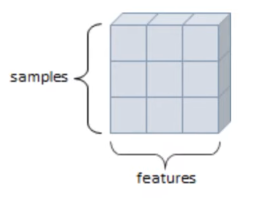

In [6]:
t2 = tf.constant([[1, 2, 3],
                  [4, 5, 6], 
                  [7, 8, 9]])
print(t2)
print(tf.rank(t2))
 

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


### 3D Tensor
- cube와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 